<a href="https://colab.research.google.com/github/Harshcs21/1BM21CS073_ML_lab/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math


In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
def calculate_entropy(data, target_column):
	total_rows = len(data)
	target_values = data[target_column].unique()

	entropy = 0
	for value in target_values:
		value_count = len(data[data[target_column] == value])
		proportion = value_count / total_rows
		entropy -= proportion * math.log2(proportion)

	return entropy

entropy_outcome = calculate_entropy(df, 'Outcome')
print(f"Entropy of the dataset: {entropy_outcome}")


Entropy of the dataset: 0.9331343166407831


In [4]:
def calculate_entropy(data, target_column):
	total_rows = len(data)
	target_values = data[target_column].unique()

	entropy = 0
	for value in target_values:
		value_count = len(data[data[target_column] == value])
		proportion = value_count / total_rows
		entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

	return entropy

def calculate_information_gain(data, feature, target_column):

	unique_values = data[feature].unique()
	weighted_entropy = 0

	for value in unique_values:
		subset = data[data[feature] == value]
		proportion = len(subset) / len(data)
		weighted_entropy += proportion * calculate_entropy(subset, target_column)

	information_gain = entropy_outcome - weighted_entropy

	return information_gain


In [5]:
for column in df.columns[:-1]:
	entropy = calculate_entropy(df, column)
	information_gain = calculate_information_gain(df, column, 'Outcome')
	print(f"{column} - Entropy: {entropy:.3f}, Information Gain: {information_gain:.3f}")


Pregnancies - Entropy: 3.482, Information Gain: 0.062
Glucose - Entropy: 6.751, Information Gain: 0.304
BloodPressure - Entropy: 4.792, Information Gain: 0.059
SkinThickness - Entropy: 4.586, Information Gain: 0.082
Insulin - Entropy: 4.682, Information Gain: 0.277
BMI - Entropy: 7.594, Information Gain: 0.344
DiabetesPedigreeFunction - Entropy: 8.829, Information Gain: 0.651
Age - Entropy: 5.029, Information Gain: 0.141


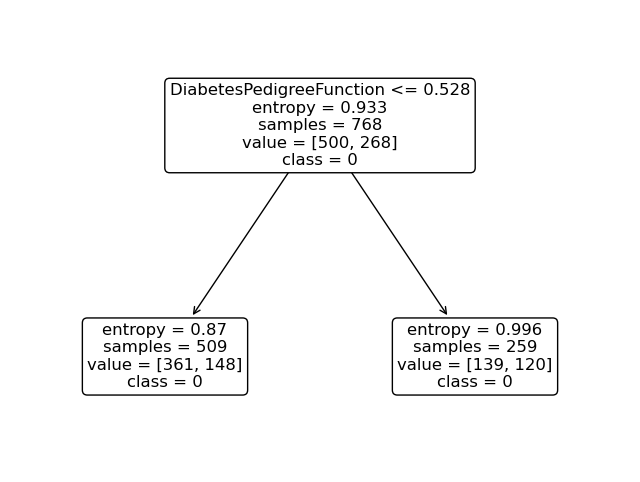

In [8]:
selected_feature = 'DiabetesPedigreeFunction'

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
X = df[[selected_feature]]
y = df['Outcome']
clf.fit(X, y)

plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=[selected_feature], class_names=['0', '1'], filled=False, rounded=True)
plt.show()


In [7]:
def id3(data, target_column, features):
	if len(data[target_column].unique()) == 1:
		return data[target_column].iloc[0]


	if len(features) == 0:
		return data[target_column].mode().iloc[0]

	best_feature = max(features, key=lambda x: calculate_information_gain(data, x, target_column))

	tree = {best_feature: {}}

	features = [f for f in features if f != best_feature]

	for value in data[best_feature].unique():
		subset = data[data[best_feature] == value]
		tree[best_feature][value] = id3(subset, target_column, features)

	return tree
